<a href="https://colab.research.google.com/github/raklives/practice-projects/blob/master/youtube_trending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as pyplot
import seaborn as sns

import warnings 
from collections import Counter 
import datetime
import wordcloud
import json

In [0]:
# hide warnings for cleaner display
warnings.filterwarnings('ignore')

# configure some options
%matplotlib inline 
%config InLineBackend.figure_format = 'retina'

In [0]:
# reading the dataset
df = pd.read_csv('/content/USvideos.csv')

In [0]:
# set visualization configurations
PLOT_COLORS = ["#268bd2", "#0053CC","#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, 
       labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [15]:
# getting a feel of the dataset
# see the first few rows
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [17]:
# let's see some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


### Data Cleaning

In [18]:
# there are some missing values in the description column
# see some of the rows whose descriptions vlues are null. 
df[df['description'].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


In [24]:
# get rid of those null values, by putting an empty string in there place
df['description'] = df['description'].fillna(value="")

# check
df[df['description']==""].head(3)

# it worked. we now have blank spaces in the place of NaN's in description column

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945,7,5,8,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169,2017,2425,1447,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827,3,0,2,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,


### Dataset Collection years
#### Let's see in which years the dataset was collected

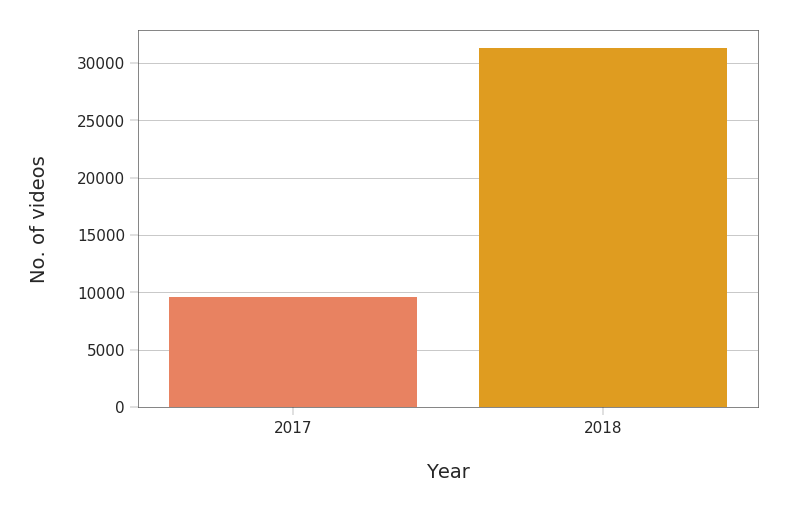

In [44]:
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos");

In [55]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)
# 77% was collected in 2018 and 23% was collected in 2017

2018   0.77
2017   0.23
Name: trending_date, dtype: float64

### Description of numerical columns

In [50]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


In [0]:
# from this we've learned the following
# average number of views on a trnading video is 2,360,784
# Median value for number of views is 681,861. Meaning had of trending videos have 
# more than that number, and the other half have less than that. 
# the average number of likes of a trending video is 74,266. 
# the average comment count is 8,466, while the median is 1,856. 

In [0]:
# plot a histogram for the views column to take a look at it's distribution
# to see how many videos have between 10 million and 20 million views. 
# how many videos have between 20 million and 30 million views. 

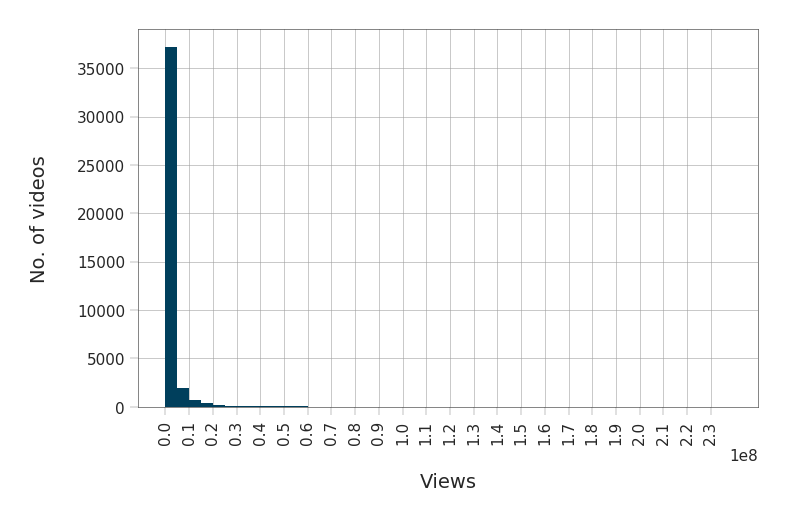

In [62]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], 
                hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

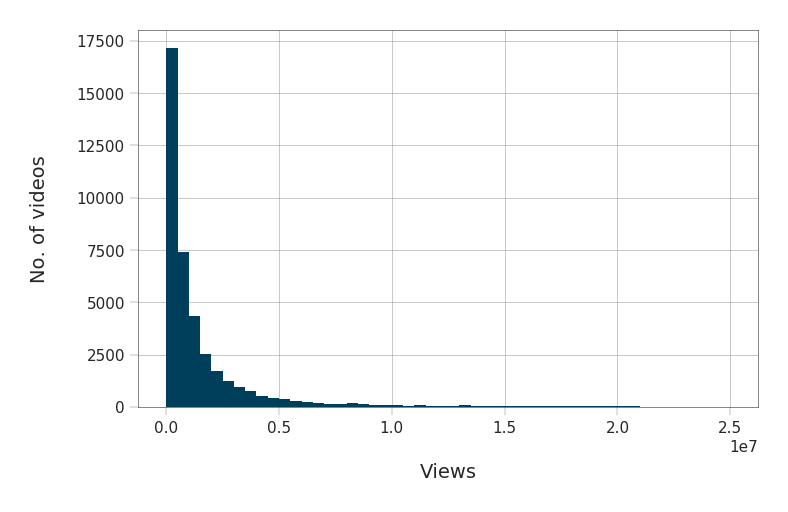

In [65]:
# let's create a histogram of video with 25 million views or less
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False, 
                color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

In [0]:
# from both histograms we that the majority of videos have 1 million views or less

In [66]:
# percentage of videos with less than 1 million views
df[df["views"] < 1e6]['views'].count() / df['views'].count() * 100

60.09426359618062

In [0]:
# number of views with less than 1 million views is around 60%

In [67]:
# percentage of trending videos with less than 5 million views
df[df['views'] < 5e6]['views'].count() / df['views'].count() * 100

90.81052040342865

In [68]:
# percentage with more than 20 million views
df[df['views'] > 20e6]['views'].count() / df['views'].count() * 100

1.6996752057437299

### Plotting the Likes values

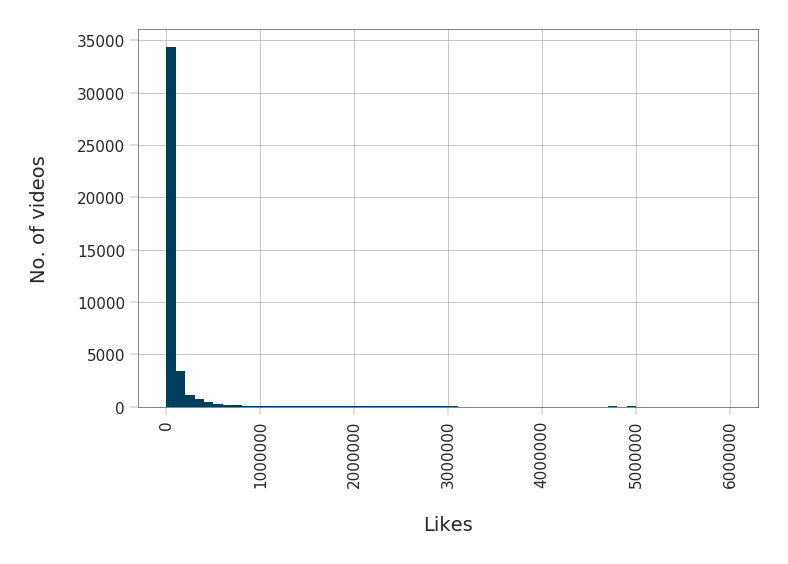

In [71]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df['likes'], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel='Likes', ylabel="No. of videos")
_ = plt.xticks(rotation=90)

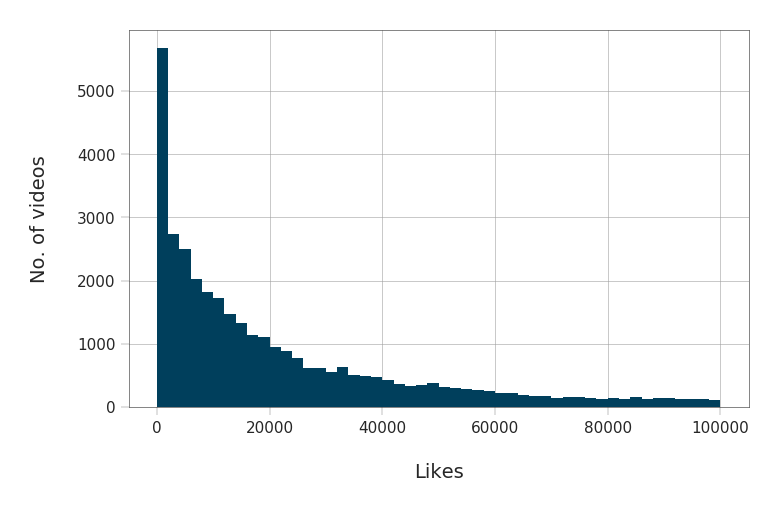

In [73]:
# we see that the vas majority of videos have between 0 and 100,00 likes. 
# let's see a histogram of videos with 100,000 likes or less
fig, ax = plt.subplots()
_ = sns.distplot(df[df['likes'] <=1e5]['likes'], kde=False, 
                color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel='No. of videos')

In [75]:
# we see that the vast majority of trending videos have 40000 likes or less
# let's see exact percentage of videos with 40000 likes or less
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

68.4900730176561

In [0]:
# about 68% of all trending videos have less than 40000 likes

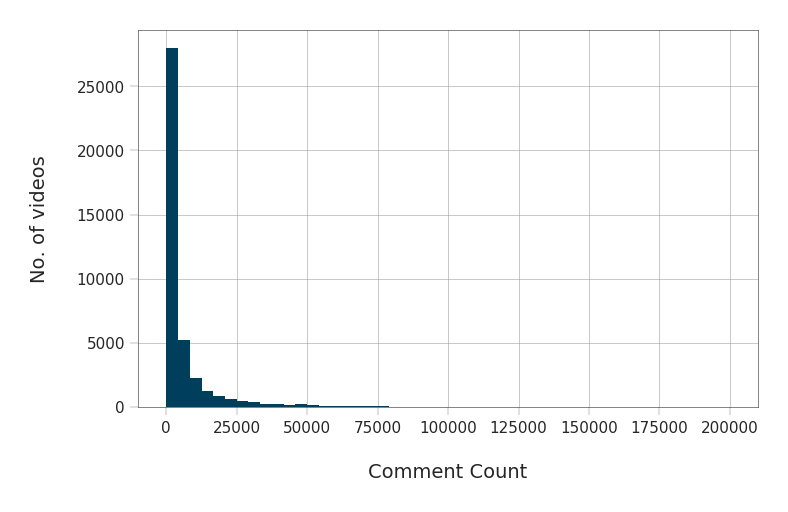

In [92]:
# let's get a closer look
fig, ax = plt.subplots()
_ = sns.distplot(df[df['comment_count'] < 200000]['comment_count'], kde=False, rug=False, 
                color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                bins = np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel='Comment Count', ylabel="No. of videos")  

In [0]:
# most trending videos have less than 4000 comments

In [93]:
# percentage of trending videos with less than 4000 comments
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

67.48882756599673

### Description of non-numerical columns

In [95]:
df.describe(include=['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40949
unique,6351,205,6455,2207,6269,6055,6352,6902
top,j4KvrAUjn6c,18.18.01,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,
freq,30,200,30,203,50,1535,30,570


In [0]:
# what we can learn 
# there are 205 unique dates 
# there are 40949 videos, with only 6351 unique videos 
# top title was WE MADE OUR MOM CRY...HER DREAM CAME TRUE
# but there are more trending titles and descriptions than there are video_id. 
# we find out which titles are repeating?

In [102]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
  groups.append(grouped.get_group(key))

for g in groups:
  if len(g['title'].unique()) !=1:
    wanted_groups.append(g)

wanted_groups[0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
14266,0ufNmUyf2co,18.26.01,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",183149,6969,68,824,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
14491,0ufNmUyf2co,18.27.01,Here are the weirdest bikes I own - Freak Bike...,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",203919,7358,72,746,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
14706,0ufNmUyf2co,18.28.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",216447,7608,74,759,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
14931,0ufNmUyf2co,18.29.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",227005,7754,78,759,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
15175,0ufNmUyf2co,18.30.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",233482,7852,78,769,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...
15385,0ufNmUyf2co,18.31.01,Bike Check - My freak bikes,Seth's Bike Hacks,26,2018-01-25T00:00:04.000Z,"bikes|""bicycles""|""weird bikes""|""custom bikes""|...",238483,7894,81,778,https://i.ytimg.com/vi/0ufNmUyf2co/default.jpg,False,False,False,Some of the questions I get most are about my ...


In [0]:
# we see that the video id appeared under two different titles 

### How many trending videos contain capitalized words?

In [0]:
# we do this by :
# add a new column to the data frame
# that will returen TRUE/ FALSE if the video title from that row has atleast one
#  capitalized word in it

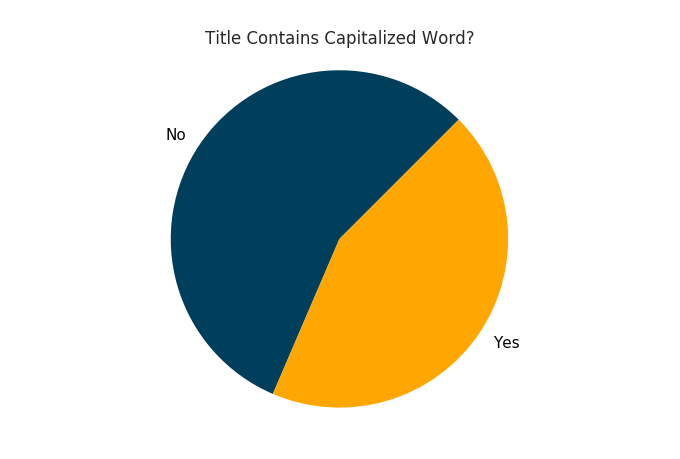

In [124]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False

df['contains_capitalized'] = df['title'].apply(contains_capitalized_word)

value_counts = df['contains_capitalized'].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, 
           startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?');

In [115]:
# find percentage
df['contains_capitalized'].value_counts(normalize=True)

False   0.56
True    0.44
Name: contains_capitalized, dtype: float64

### Video title lengths

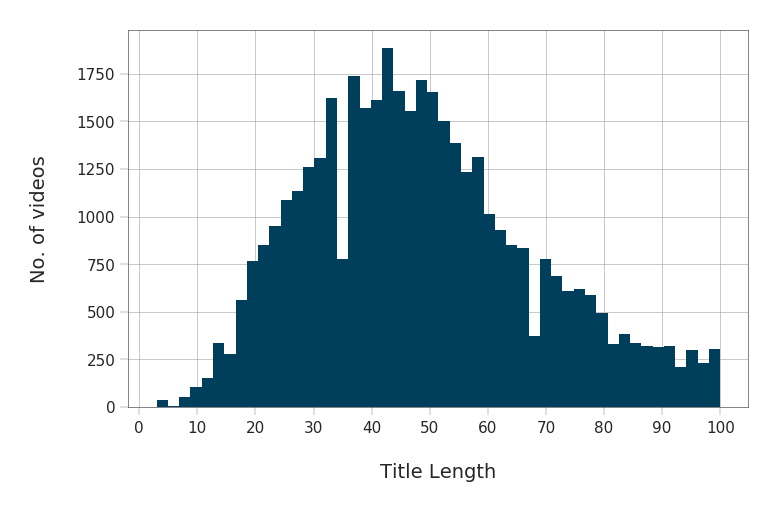

In [126]:
# add another column to the dataset to represent the length of each video title
df["title_length"] = df['title'].apply(lambda x: len(x))


# create a histogram of the distribution of values in title_length
fig, ax = plt.subplots()
_ = sns.distplot(df['title_length'], kde=False, rug=False, 
                 color = PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0,110,10))

In [0]:
# the distribution of values in title length resemble a normal distribution
# where most videos have title lengths of 30 and 60 character approximately. 

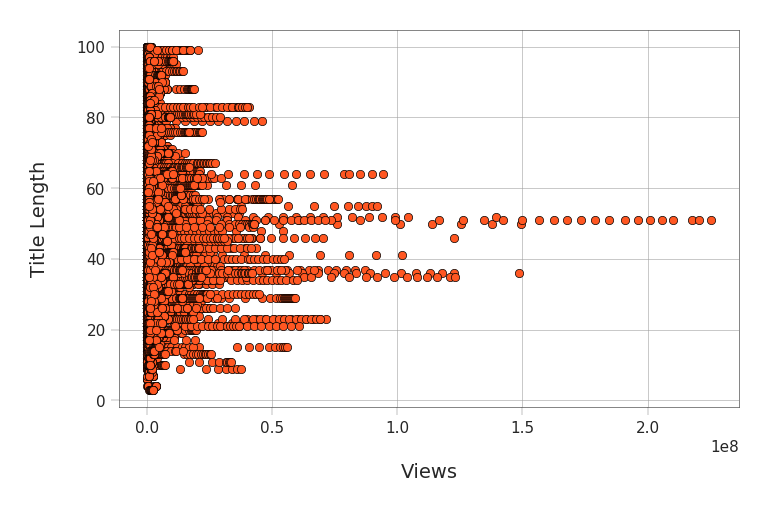

In [131]:
# draw a scatter plot between title length and number of views to see relationship
# between the two variables

fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], 
               edgecolors='#000000', linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

In [0]:
# there is no relationshi between title length and number views. 
# but videos with 100,000,000 views and more have title length between 33 and 55 chracters 

### Correlation between dataset variables

In [144]:
# see how the different variables are correlated
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,contains_capitalized,title_length
category_id,1.00,-0.17,-0.17,-0.03,-0.08,0.05,-0.01,-0.03,0.06,0.02
views,-0.17,1.00,0.85,0.47,0.62,0.00,0.02,-0.00,-0.03,-0.04
likes,-0.17,0.85,1.00,0.45,0.80,-0.03,-0.02,-0.00,-0.00,-0.08
dislikes,-0.03,0.47,0.45,1.00,0.70,-0.00,-0.01,-0.00,-0.02,-0.03
comment_count,-0.08,0.62,0.80,0.70,1.00,-0.03,-0.01,-0.00,0.02,-0.07
comments_disabled,0.05,0.00,-0.03,-0.00,-0.03,1.00,0.32,-0.00,0.01,0.03
ratings_disabled,-0.01,0.02,-0.02,-0.01,-0.01,0.32,1.00,-0.00,0.00,0.00
video_error_or_removed,-0.03,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.02,-0.01
contains_capitalized,0.06,-0.03,-0.00,-0.02,0.02,0.01,0.00,-0.02,1.00,0.13
title_length,0.02,-0.04,-0.08,-0.03,-0.07,0.03,0.00,-0.01,0.13,1.00


In [0]:
# we see a high correlation between likes and views
# we see a higher correlation between dislikes and comment_count, compared to dislikes and views
#> this could suggest that for 
# title length for trending videos has negative or no correlation with every other measured value according to the statistics

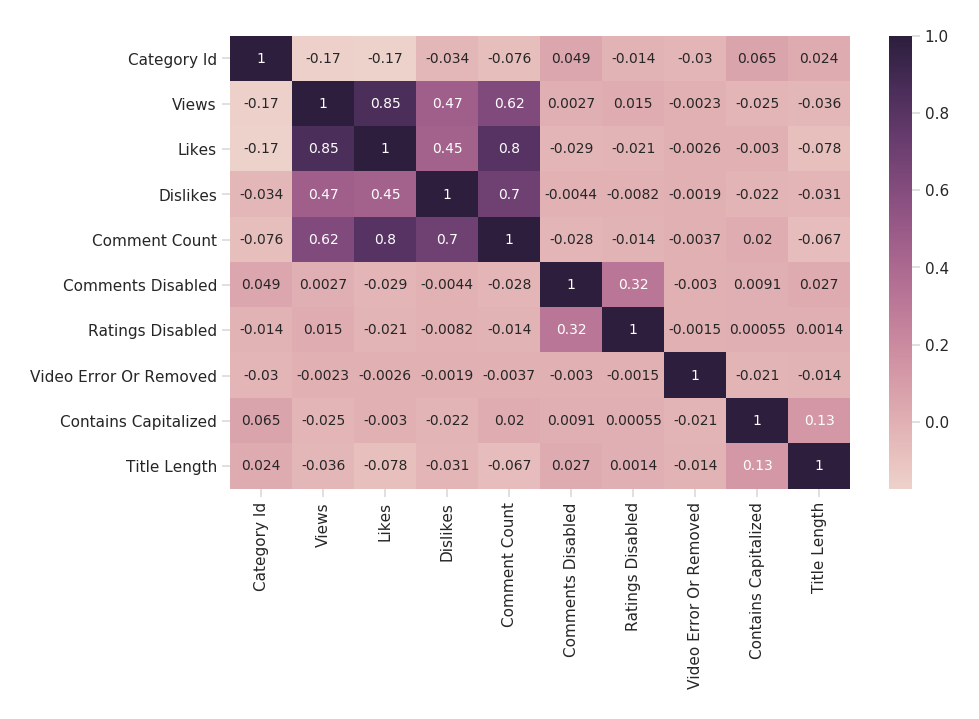

In [157]:
# let's visualize the correlation table using a heatmap
h_labels = [x.replace('_', ' ').title() for x in list(df.select_dtypes
                                                      (include=['number','bool']
                                                       ).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels,
                yticklabels=h_labels,
                cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

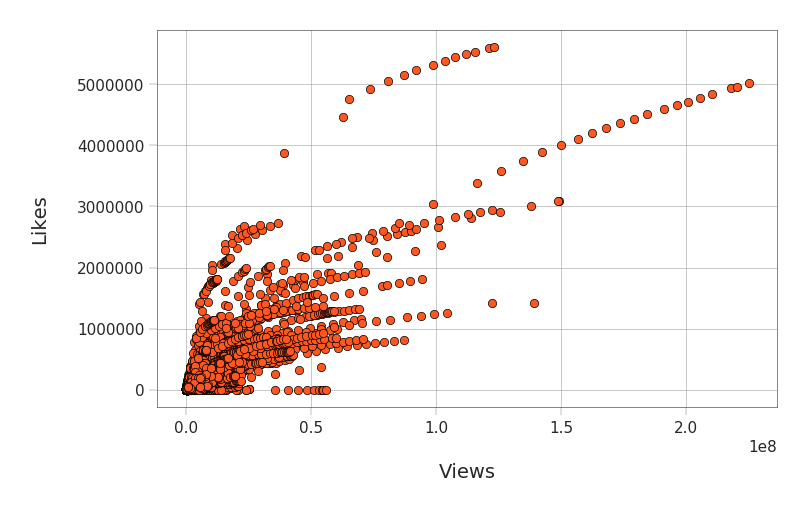

In [160]:
# let's verify the high corrlation between views and likes to verigy their relationship
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors='#000000', linewidths=0.5)
_ = ax.set(xlabel='Views', ylabel='Likes')

Most common words in video titles

In [162]:
# diplay the 25 most common words in trending video titles
title_words = list(df['title'].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017)]

In [0]:
# after ignoring words like 'the' and "of", "-" and "|" symbold occured alot in
# trending video titles
# also noticed the words "Video", "Trailer", "How", and "2018" are more common in 
# trending video titles

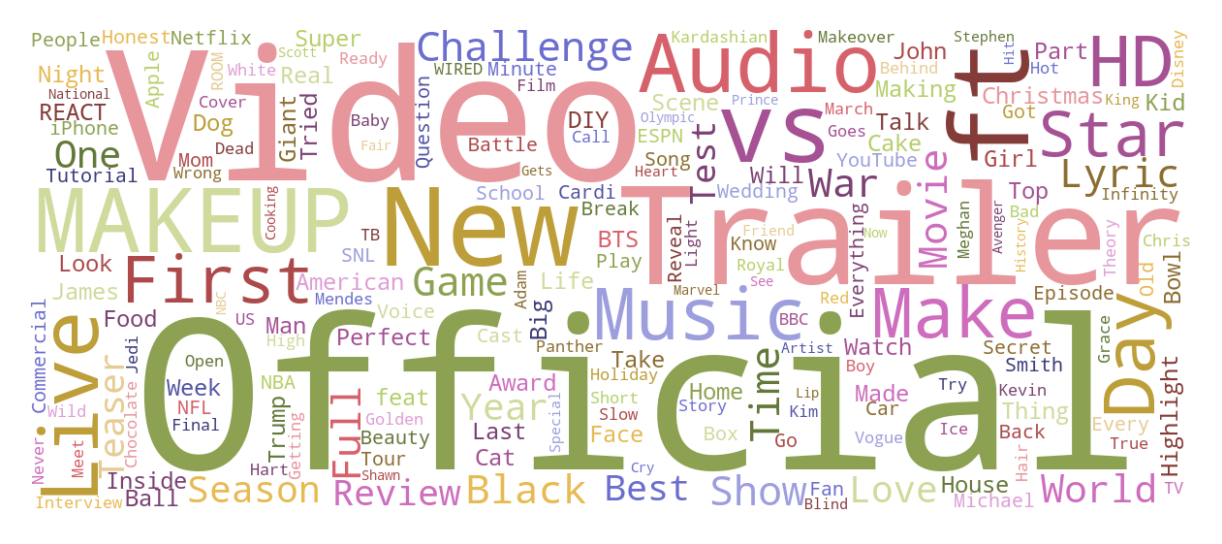

In [166]:
# draw a word cloud, the more common the word the bigger the font size
#wc = wordcloud.WordCloud(width=1200, height=600, 
#                        collocations=False, stopwords=None, 
#                         bacground_color='white', 
 #                        colormap'tab20b').generate_from_freque

wc = wordcloud.WordCloud(width=1200, height=500, 
                          collocations=False, 
                          background_color='white', 
                          colormap='tab20b').generate(" ".join(title_words))

plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis('off')

# Which channels have the largest number of trending videos

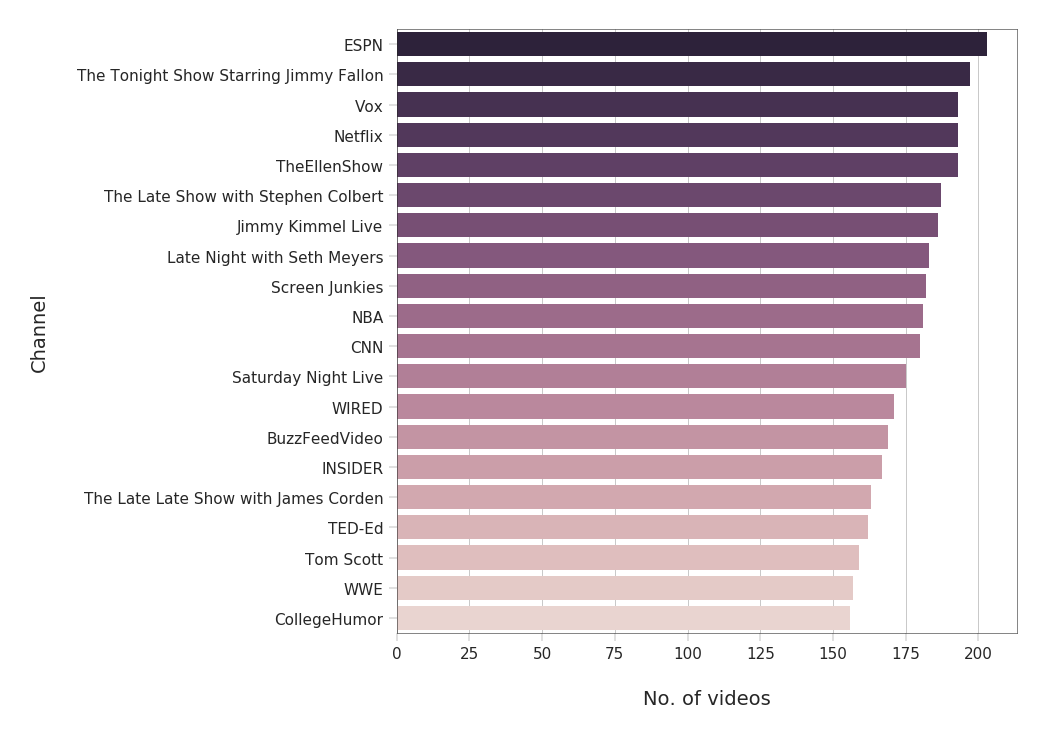

In [168]:
cdf = df.groupby('channel_title').size().reset_index(
    name='video_count').sort_values('video_count', 
                                    ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=20, reverse=True),
                ax=ax)
_ = ax.set(xlabel='No. of videos', ylabel='Channel')

### Which video category has the largest number of trending videos?
